Alden Ardiwinata Putra

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
# import dataset, read CSV file
df = pd.read_csv('/content/train.csv', parse_dates=['order_date'])


In [ ]:
# view the top 5 row of the dataset
df.head(5)


,order_id,item_sku,item_name,quantity,order_date,price_per_unit,user_id,country,gmv
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
1,536392,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-01 10:29:00,1.69,13705.0,United Kingdom,27.04
2,536395,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 10:47:00,1.69,13767.0,United Kingdom,54.08
3,536408,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2010-12-01 11:41:00,1.69,14307.0,United Kingdom,13.52
4,536460,84879,ASSORTED COLOUR BIRD ORNAMENT,24,2010-12-01 12:22:00,1.69,14849.0,United Kingdom,40.56


In [ ]:
# brief information about dataset composition
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        7907 non-null   int64         
 1   item_sku        7907 non-null   int64         
 2   item_name       7907 non-null   object        
 3   quantity        7907 non-null   int64         
 4   order_date      7907 non-null   datetime64[ns]
 5   price_per_unit  7907 non-null   float64       
 6   user_id         7907 non-null   float64       
 7   country         7907 non-null   object        
 8   gmv             7907 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 556.1+ KB


In [ ]:
# statistical description of dataset
df.describe()


,order_id,item_sku,quantity,price_per_unit,user_id,gmv
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,558108.468446,39781.802327,25.709877,5.169617,15243.175035,65.914094
std,10970.037447,24523.371990,836.577544,3.908811,1675.914337,879.764021
min,536367.000000,21137.000000,1.000000,1.040000,12346.000000,1.250000
25%,549977.000000,22423.000000,3.000000,2.080000,13845.500000,13.520000
50%,558351.000000,23298.000000,6.000000,4.950000,15150.000000,20.800000
75%,567373.000000,47566.000000,12.000000,4.950000,16686.000000,42.960000
max,576078.000000,84879.000000,74215.000000,24.960000,18283.000000,77183.600000


In [ ]:
# check missing value(s)
print(df.isnull().sum(), '\n')

# check uniquity
print(df.nunique())


order_id          0
item_sku          0
item_name         0
quantity          0
order_date        0
price_per_unit    0
user_id           0
country           0
gmv               0
dtype: int64 

order_id          5724
item_sku            10
item_name           10
quantity            74
order_date        5588
price_per_unit      33
user_id           2222
country             33
gmv                300
dtype: int64


<Axes: >

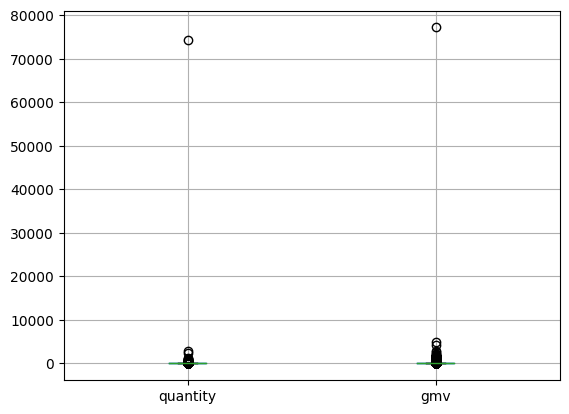

In [ ]:
# boxplot (numeric only) for outlier detection
df[['quantity', 'gmv']].boxplot()


In [ ]:
# outlier removal using interquartile range
distance = 1.5 * (np.percentile(df['gmv'], 75) - np.percentile(df['gmv'], 25))
df.drop(df[df['gmv'] > distance + np.percentile(df['gmv'], 75)].index, inplace=True)
df.drop(df[df['gmv'] < np.percentile(df['gmv'], 25) - distance].index, inplace=True)


<Axes: >

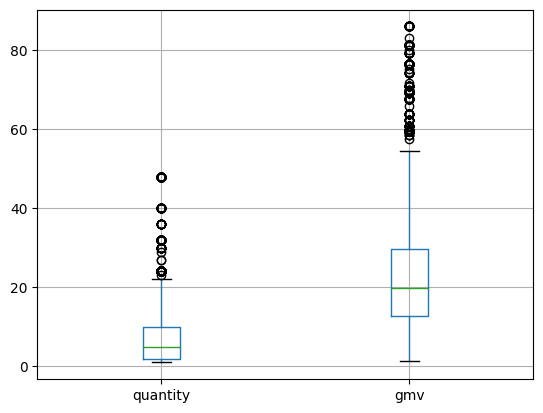

In [ ]:
# boxplot (numeric only) for outlier detection after removal
df[['quantity', 'gmv']].boxplot()


In [ ]:
df.describe()

,order_id,item_sku,quantity,price_per_unit,user_id,gmv
count,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000
mean,558412.067648,40156.845604,7.444963,5.049328,15273.363027,24.410246
std,10857.880889,24698.376993,7.953055,3.893685,1679.778062,17.840127
min,536367.000000,21137.000000,1.000000,1.040000,12347.000000,1.250000
25%,550521.000000,22423.000000,2.000000,2.080000,13869.000000,12.750000
50%,558630.000000,23298.000000,5.000000,4.950000,15159.000000,19.800000
75%,567692.000000,47566.000000,10.000000,4.950000,16729.000000,29.700000
max,576078.000000,84879.000000,48.000000,24.960000,18283.000000,85.920000


<ipython-input-13-cc35030752cb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


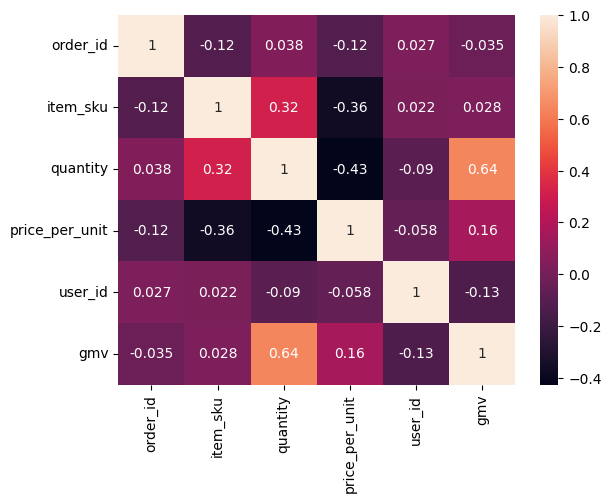

In [ ]:
# project the correlation matrix
figsize=(20,10)
sns.heatmap(df.corr(), annot = True)

df_sq = df


In [ ]:
'''
End of Section
'''

'\nEnd of Section\n'

# Forecasting Model for Global Level Sales for Each Product

In [ ]:
# create a list of product's SKU(s)
sku_list = df.groupby(['item_sku', 'item_name'], as_index=False).sum()
sku_list = sku_list['item_sku']

# set index to order_date for time series analysis
df.set_index('order_date', inplace=True)

# resample the dataset for weekly time series analysis and sum all the daily data
df_pred = df.groupby('item_sku').resample('D').sum(numeric_only=True)
df = df.groupby('item_sku').resample('W').sum(numeric_only=True)

# using forward fill to handle missing value if any
df.fillna(method='ffill', inplace=True)
df_pred.fillna(method='ffill', inplace=True)

# drop unnecessary column(s)
df = df.drop(columns = 'order_id', axis = 1)
df = df.drop(columns = 'item_sku', axis = 1)
df = df.drop(columns = 'price_per_unit', axis = 1)
df = df.drop(columns = 'quantity', axis = 1)
df = df.drop(columns = 'user_id', axis = 1)


<ipython-input-15-91023ec61a66>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sku_list = df.groupby(['item_sku', 'item_name'], as_index=False).sum()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -171.040
Date:                           Sun, 29 Oct 2023   AIC                            350.080
Time:                                   06:48:05   BIC                            355.549
Sample:                               12-05-2010   HQIC                           351.792
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      9.641      0.104      0.917     -17.897      19.896
ma.L1         -0.8899      0.308     -2.890

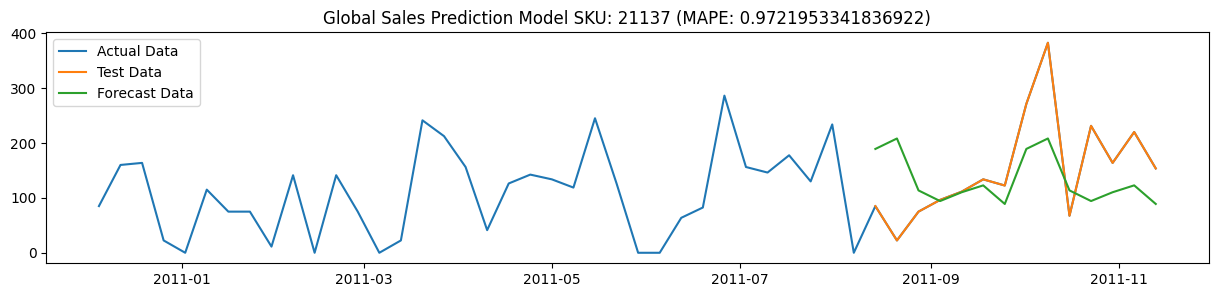

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -188.606
Date:                           Sun, 29 Oct 2023   AIC                            385.213
Time:                                   06:48:06   BIC                            390.682
Sample:                               12-05-2010   HQIC                           386.925
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1697      0.159      1.065      0.287      -0.143       0.482
ma.L1          0.9999      0.191      5.247

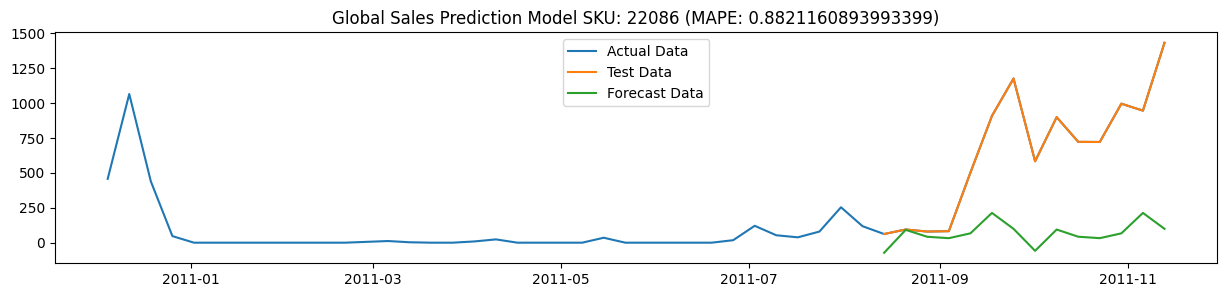

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertib

                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -173.624
Date:                           Sun, 29 Oct 2023   AIC                            355.248
Time:                                   06:48:08   BIC                            360.717
Sample:                               12-05-2010   HQIC                           356.961
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3311.218      0.000       0.999       1.001
ma.L1         -0.9834      1.432     -0.687

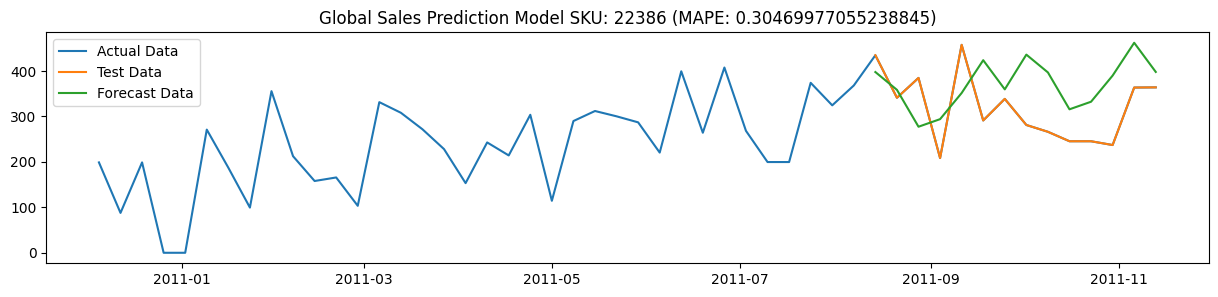

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -204.205
Date:                           Sun, 29 Oct 2023   AIC                            416.409
Time:                                   06:48:09   BIC                            421.878
Sample:                               12-05-2010   HQIC                           418.122
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2266      0.383      0.592      0.554      -0.524       0.977
ma.L1          0.3347      0.381      0.879

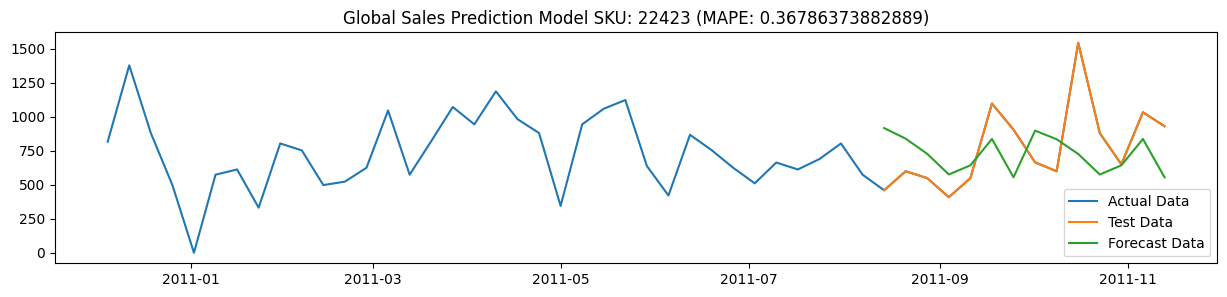

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   13
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                 -41.192
Date:                           Sun, 29 Oct 2023   AIC                             90.384
Time:                                   06:48:11   BIC                             89.551
Sample:                               05-15-2011   HQIC                            87.050
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4927      1.265      0.389      0.697      -1.987       2.972
ma.L1          0.5434      1.698      0.320

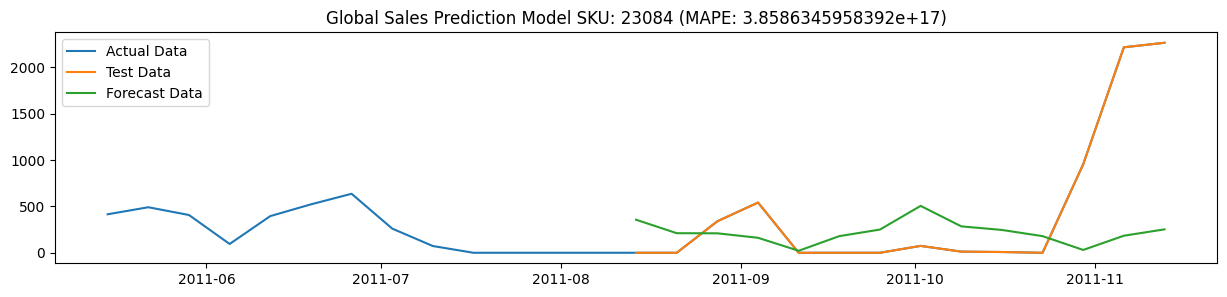

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   13
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                 -34.713
Date:                           Sun, 29 Oct 2023   AIC                             77.426
Time:                                   06:48:13   BIC                             76.593
Sample:                               05-15-2011   HQIC                            74.091
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7237      2.870      0.252      0.801      -4.902       6.350
ma.L1         -0.4211      3.155     -0.133

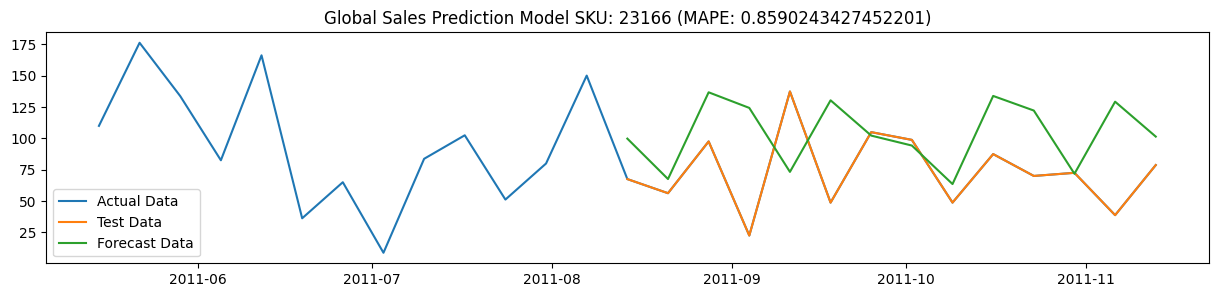

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   14
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                 -51.778
Date:                           Sun, 29 Oct 2023   AIC                            111.556
Time:                                   06:48:15   BIC                            111.340
Sample:                               05-08-2011   HQIC                           108.882
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1938      1.386     -0.140      0.889      -2.910       2.522
ma.L1          0.6828      1.452      0.470

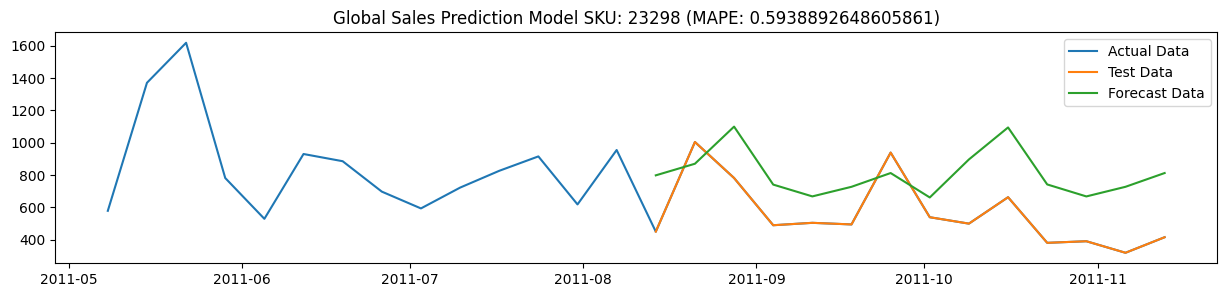

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -203.045
Date:                           Sun, 29 Oct 2023   AIC                            414.089
Time:                                   06:48:16   BIC                            419.559
Sample:                               12-05-2010   HQIC                           415.802
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7603      0.194      3.927      0.000       0.381       1.140
ma.L1          0.4150      0.157      2.641

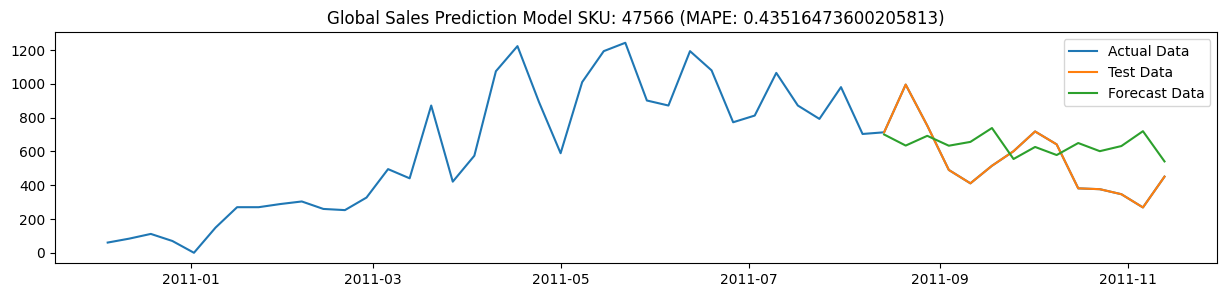

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -179.333
Date:                           Sun, 29 Oct 2023   AIC                            366.666
Time:                                   06:48:17   BIC                            372.135
Sample:                               12-05-2010   HQIC                           368.379
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1039      0.591     -0.176      0.860      -1.262       1.054
ma.L1          0.4562      0.600      0.760

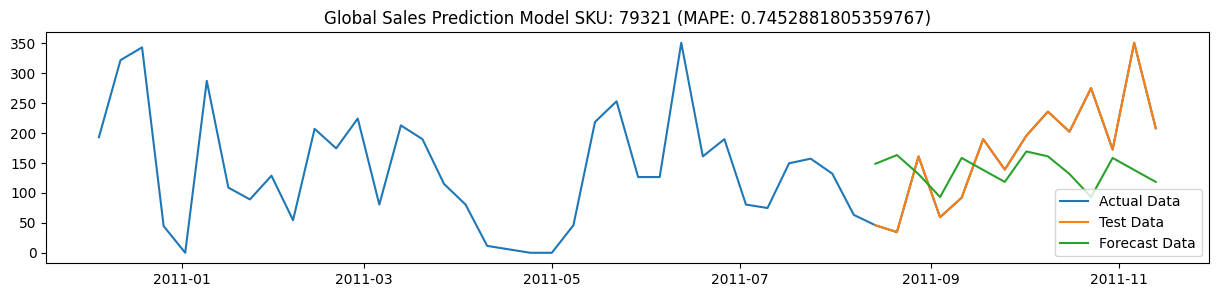

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                               gmv   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -197.921
Date:                           Sun, 29 Oct 2023   AIC                            403.842
Time:                                   06:48:18   BIC                            409.311
Sample:                               12-05-2010   HQIC                           405.555
                                    - 08-07-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0330      0.235      0.140      0.888      -0.428       0.493
ma.L1          0.7197      0.184      3.915

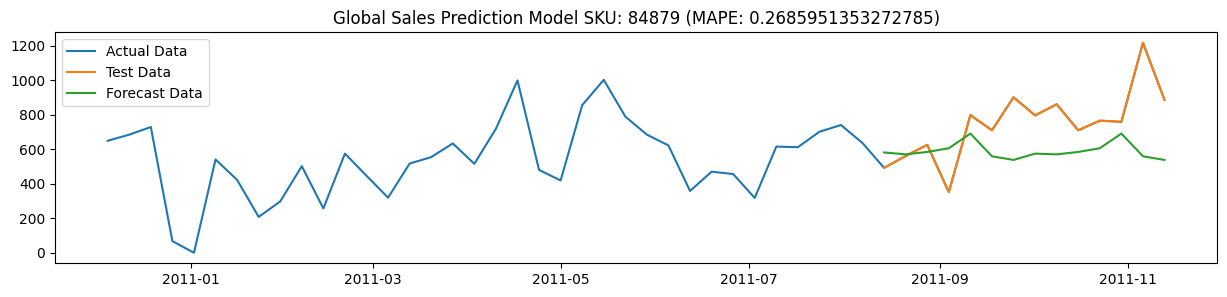

In [ ]:
# estimate model for all products
for sku in sku_list:
  # set endogenous data, train data (75%), test data (25%)
  endog = df.loc[(sku), 'gmv']
  train = endog[:-14]
  test = endog[-14:]

  # set index to DatetimeIndex for ensuring pandas readability
  endog.index = pd.DatetimeIndex(endog.index)

  # SARIMAX model training
  model = smt.SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 1, 1, 7))

  # model fitting and SARIMAX summary
  results = model.fit()
  print(results.summary())

  # forecasting the test data
  forecast = results.forecast(steps=len(test.index))

  # MAPE calculation for accuracy
  mape = mean_absolute_percentage_error(test, forecast)

  # plot for visualization between three entities: test, train, and forecast
  plt.figure(figsize=(15, 3))
  plt.title(f"Global Sales Prediction Model SKU: {sku} (MAPE: {mape})")
  plt.plot(endog.index, endog.values, label='Actual Data')
  plt.plot(test.index, test.values, label='Test Data')
  plt.plot(forecast.index, forecast.values, label='Forecast Data')
  plt.legend()
  plt.show()
  print()


In [ ]:
'''
End of Section
'''

'\nEnd of Section\n'

# Sales Quantity Forecast (2011-11-14, 2011-11-21, 2011-11-28)

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize

import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook
from itertools import product


In [ ]:
df_sq.head(5)


,order_id,item_sku,item_name,quantity,price_per_unit,user_id,country,gmv
order_date,,,,,,,,
2010-12-01 08:34:00,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,54.08
2010-12-01 10:29:00,536392,84879,ASSORTED COLOUR BIRD ORNAMENT,16,1.69,13705.0,United Kingdom,27.04
2010-12-01 10:47:00,536395,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13767.0,United Kingdom,54.08
2010-12-01 11:41:00,536408,84879,ASSORTED COLOUR BIRD ORNAMENT,8,1.69,14307.0,United Kingdom,13.52
2010-12-01 12:22:00,536460,84879,ASSORTED COLOUR BIRD ORNAMENT,24,1.69,14849.0,United Kingdom,40.56


In [ ]:
# sort the dataset based on order_date
df_sq = df_sq.sort_values(by='order_date', axis=0, ascending=True)

# make sure index is pandas readable
pd.DatetimeIndex(df_sq.index)

# resample the data so it will clustered based on daily summation
df_sq = df_sq.resample('D').sum(numeric_only=True)

# eliminate all the zero value after resample
df_sq = df_sq[df_sq['quantity'] != 0]

# using forward fill to handle missing value if any
df.fillna(method='ffill', inplace=True)

# drop the "unnecessary" column for further analysis, only keep the most relevant features
df_sq = df_sq.drop(columns = 'order_id', axis = 1)
df_sq = df_sq.drop(columns = 'item_sku', axis = 1)
df_sq = df_sq.drop(columns = 'user_id', axis = 1)
df_sq = df_sq.drop(columns = 'gmv', axis = 1)
df_sq = df_sq.drop(columns = 'price_per_unit', axis = 1)


In [ ]:
df_sq.head(5)


,quantity
order_date,
2010-12-01,217
2010-12-02,196
2010-12-03,116
2010-12-05,253
2010-12-06,274


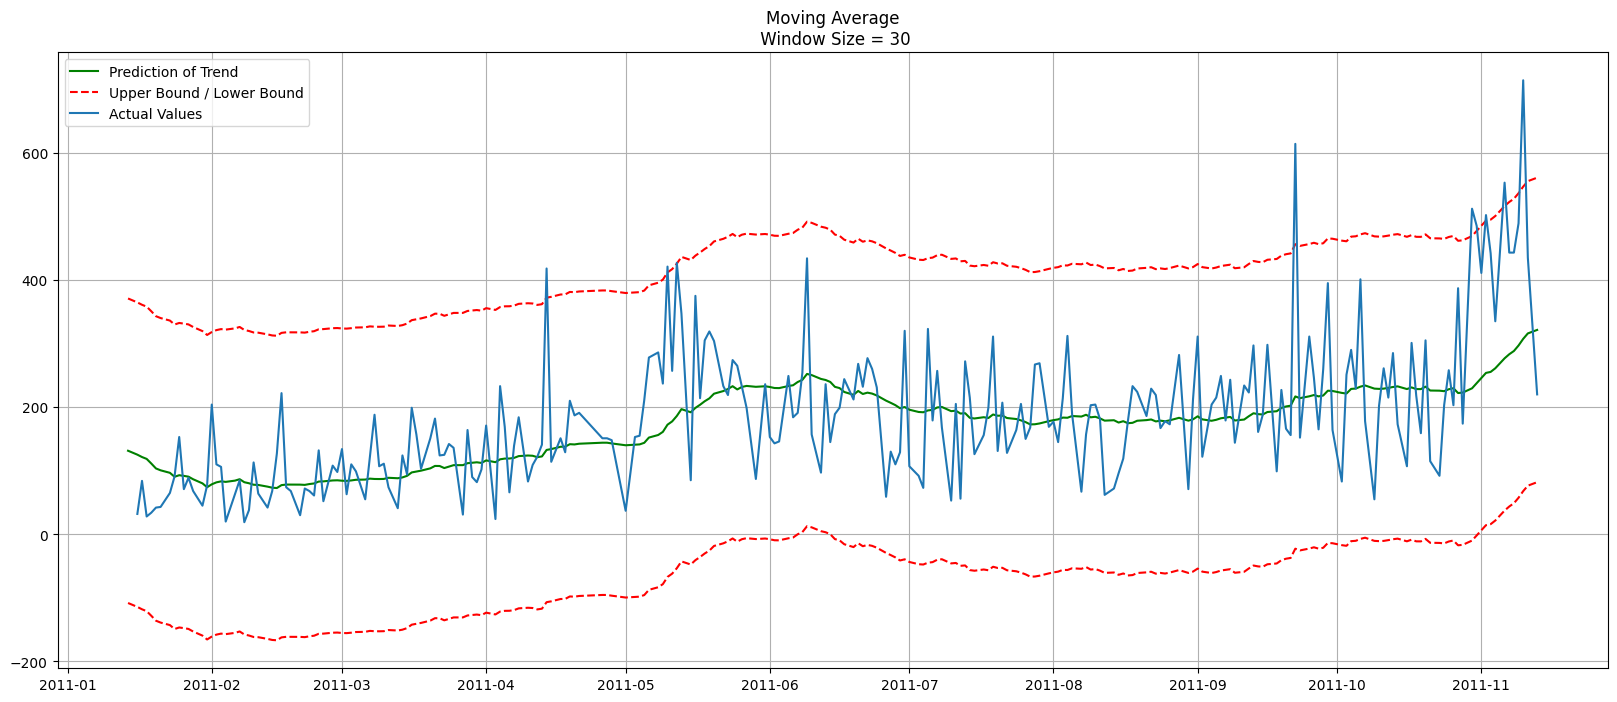

In [ ]:
# analyzing trends in weekly sales quantity
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(20,8))
    plt.title('Moving Average\n Window Size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Prediction of Trend')

    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper Bound / Lower Bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual Values')
    plt.legend(loc='best')
    plt.grid(True)

plot_moving_average(df_sq.quantity, 30, plot_intervals=True)


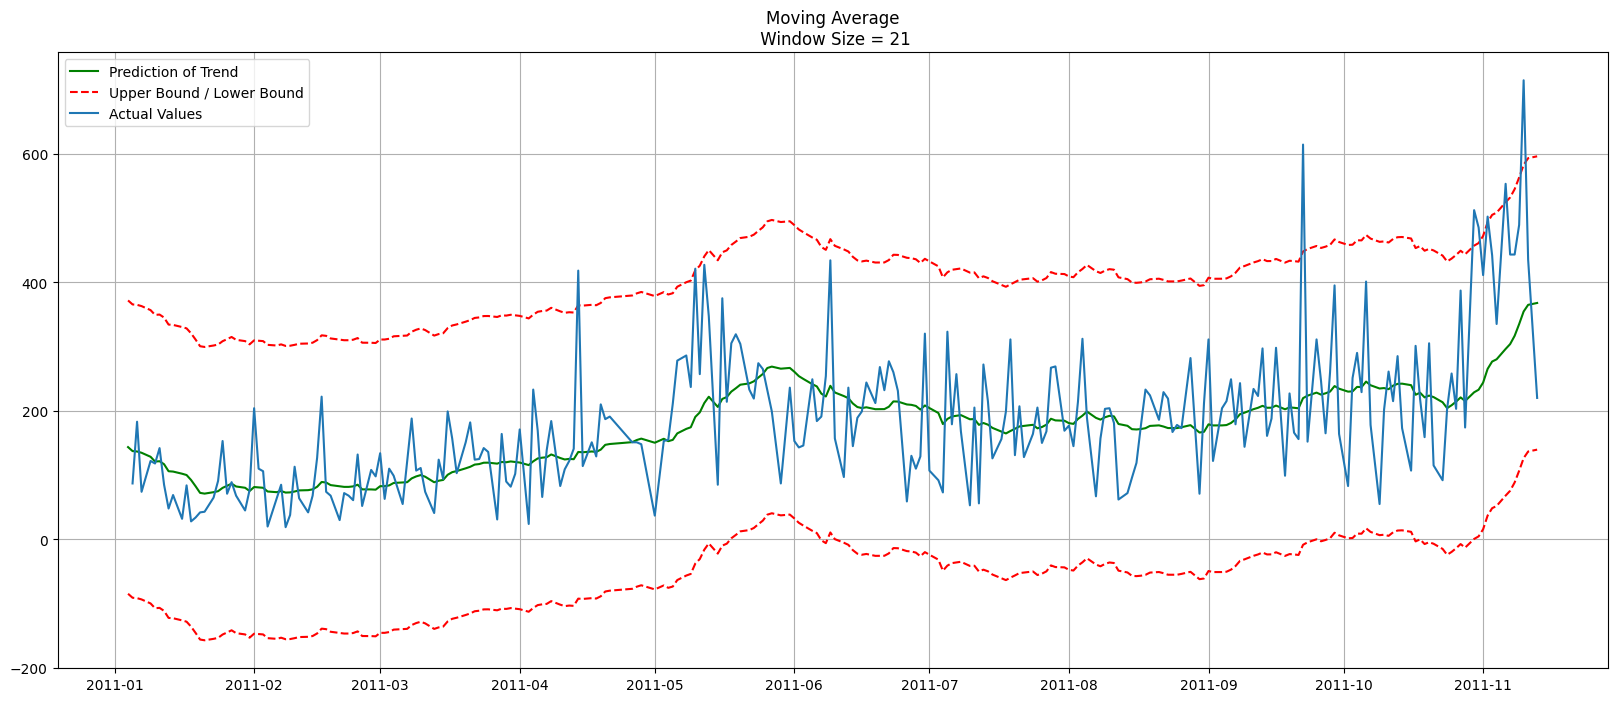

In [ ]:
# change window size
plot_moving_average(df_sq.quantity, 21, plot_intervals=True)


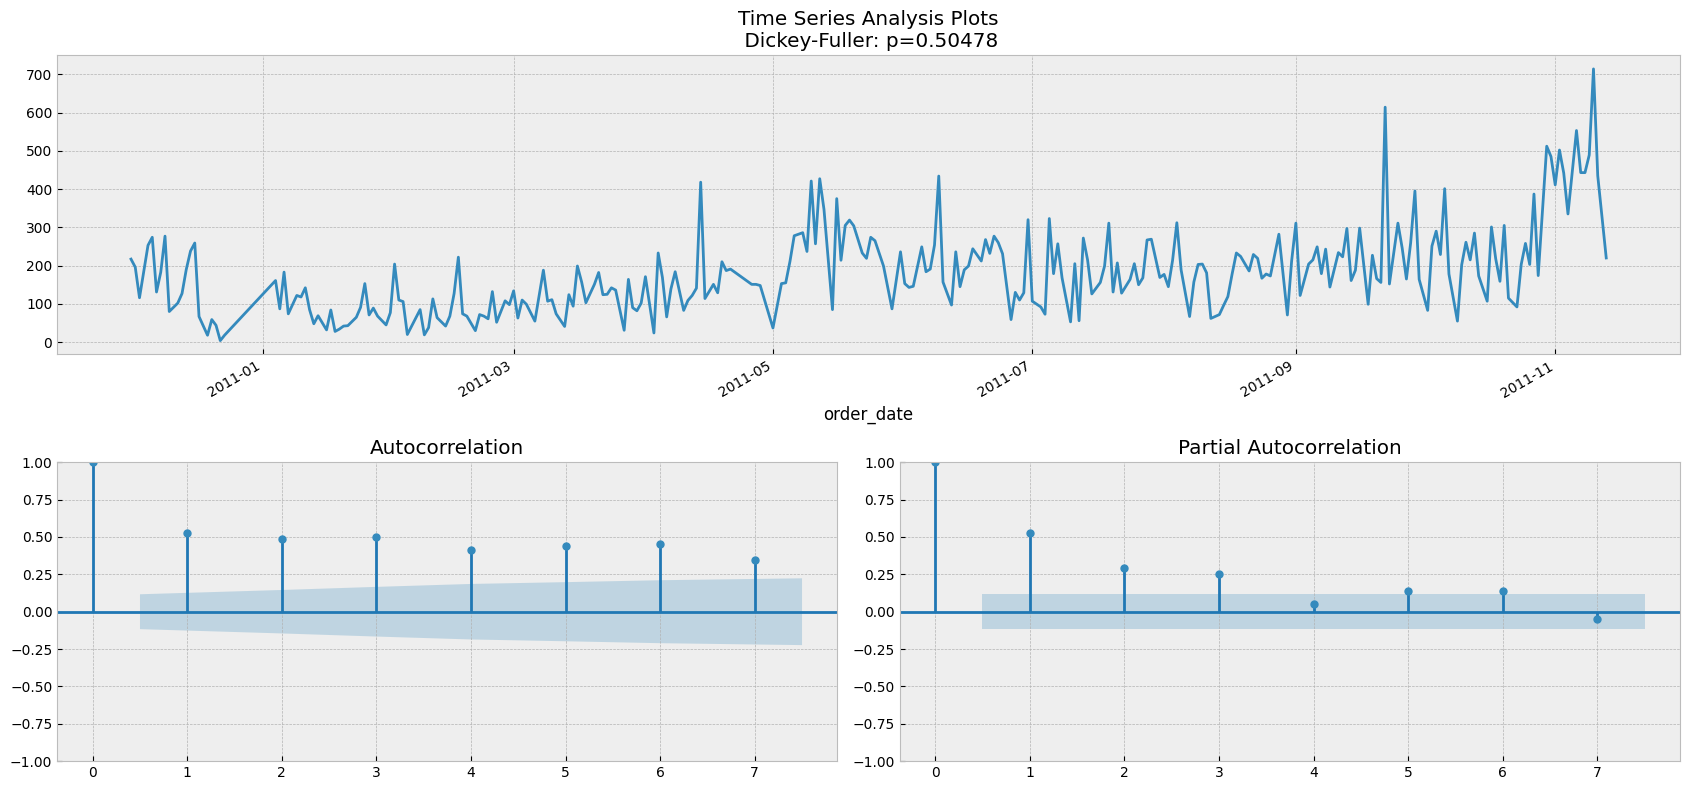

In [ ]:
# analyze data properties wether its stationary or none
def tsplot(y, lags=None, figsize=(17, 8), syle='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

tsplot(df_sq.quantity, lags=7)


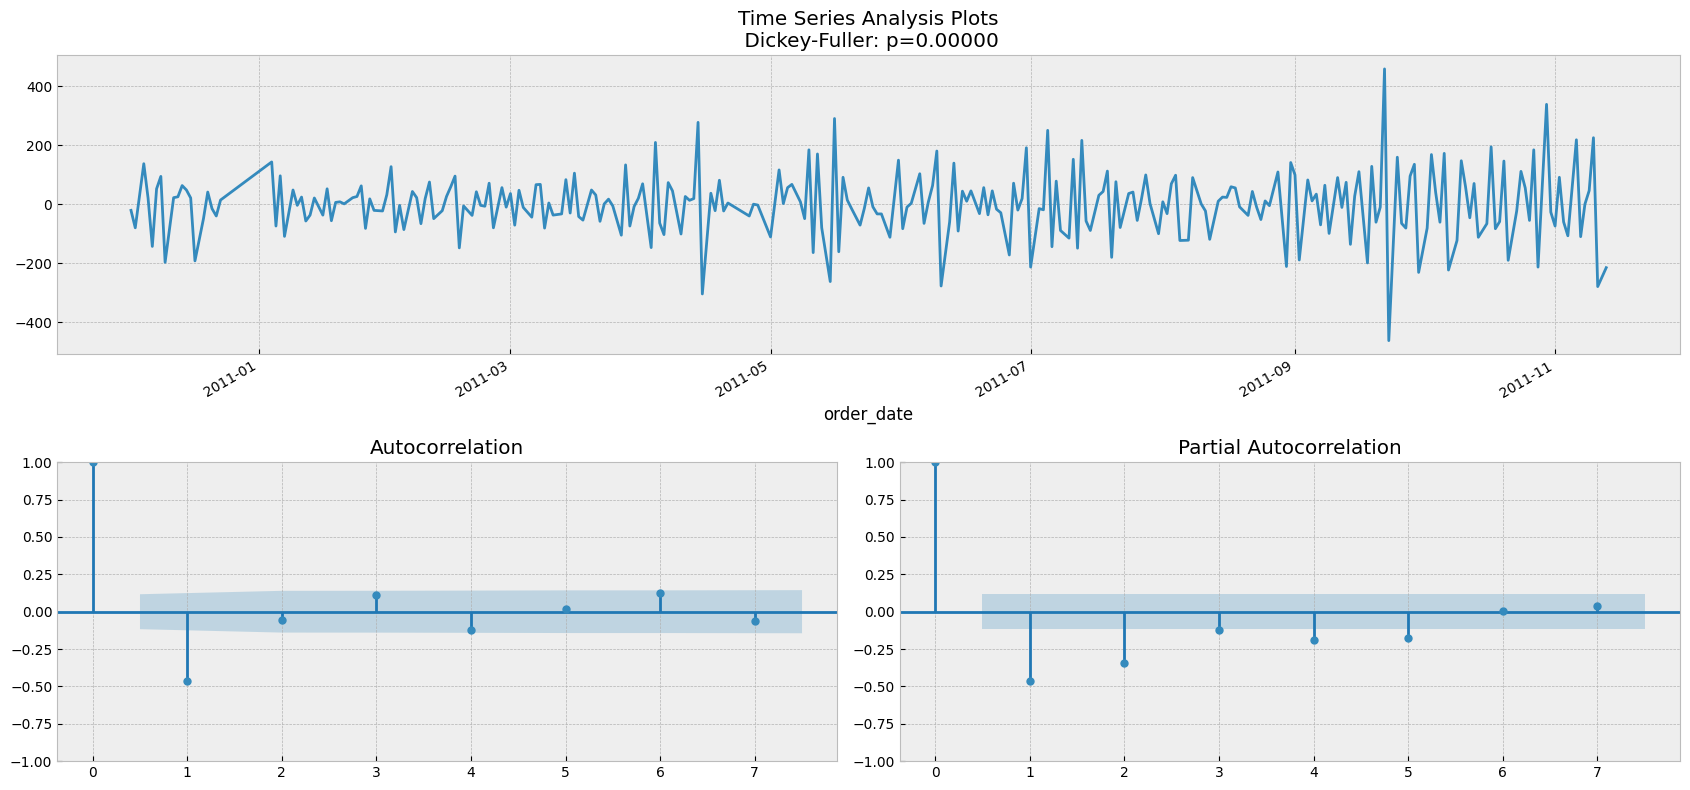

In [ ]:
# make data stationary and analyze
ds_diff = df_sq.quantity - df_sq.quantity.shift(1)
tsplot(ds_diff[1:], lags=7)


In [ ]:
# set index to pandas readable
df_sq.index = pd.DatetimeIndex(df_sq.index)

# define frequency for each index
df_sq = df_sq.asfreq(pd.infer_freq(df_sq.index))

# fill missing values using forward fill
df_sq.fillna(method='ffill', inplace=True)


In [ ]:
# splitting test and train data
endog_sq = df_sq
train_sq = endog_sq[:-70].astype('float')
test_sq = endog_sq[-70:].astype('float')


In [ ]:
# model training
model_sq = smt.SARIMAX(train_sq, order=(1, 0, 1), seasonal_order=(0, 1, 1, 70))


In [ ]:
# result summary
results_sq = model_sq.fit()
print(results_sq.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  278
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 70)   Log Likelihood               -1207.286
Date:                            Sun, 29 Oct 2023   AIC                           2422.572
Time:                                    06:48:57   BIC                           2435.922
Sample:                                12-01-2010   HQIC                          2427.970
                                     - 09-04-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9545      0.025     37.991      0.000       0.905       1.004
ma.L1         -0.6597      0.061   

In [ ]:
# forecast to desired test data
forecast_sq = results_sq.forecast('2011-11-13')


In [ ]:
# MAPE calculation for accuracy
mape_sq = mean_absolute_percentage_error(test_sq, forecast_sq)
print(mape_sq)


0.34300308768972737


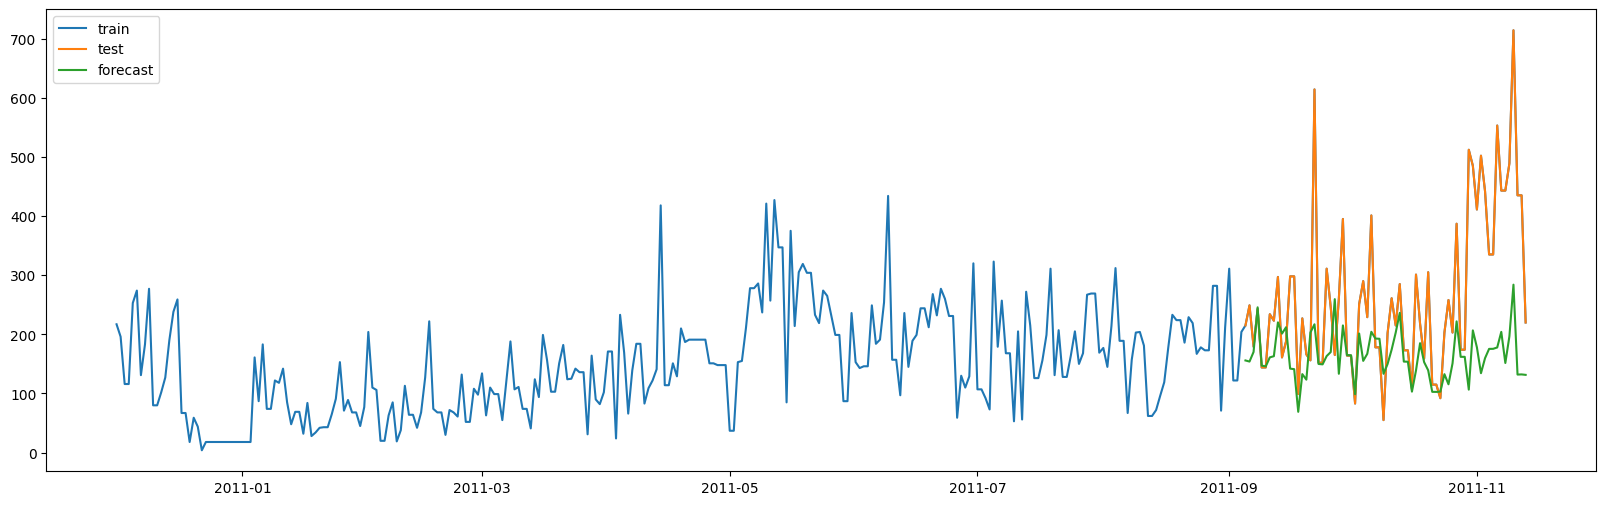

In [ ]:
# plotting
plt.figure(figsize=(20, 6))
plt.plot(endog_sq.index, endog_sq.values, label='train')
plt.plot(test_sq.index, test_sq.values, label='test')
plt.plot(forecast_sq.index, forecast_sq.values, label='forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  278
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 70)   Log Likelihood               -1257.627
Date:                            Sun, 29 Oct 2023   AIC                           2523.255
Time:                                    06:49:50   BIC                           2536.605
Sample:                                12-01-2010   HQIC                          2528.653
                                     - 09-04-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3638      0.118      3.095      0.002       0.133       0.594
ma.L1         -0.6993      0.100   

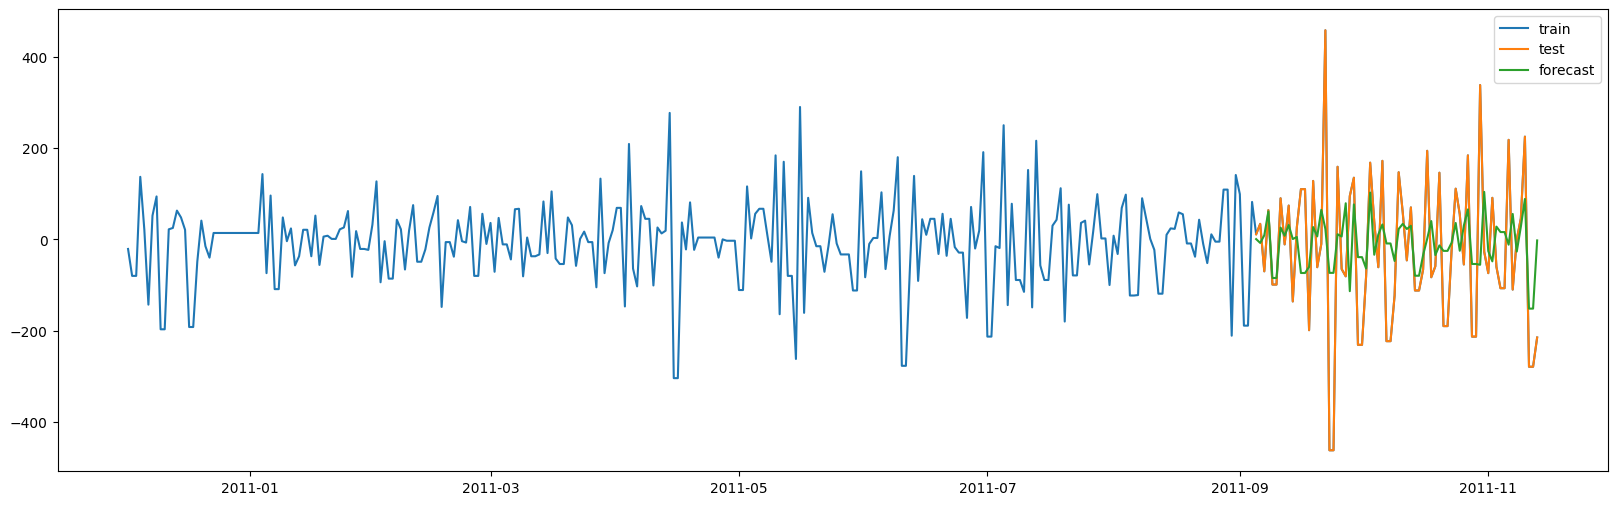

In [ ]:
# repeat the same procedure for the stationary data
ds_diff.index = pd.DatetimeIndex(ds_diff.index)
ds_diff = ds_diff.asfreq(pd.infer_freq(ds_diff.index))
ds_diff.fillna(method='ffill', inplace=True)

endog_diff = ds_diff
train_diff = endog_diff[:-70].astype('float')
test_diff = endog_diff[-70:].astype('float')

model_diff = smt.SARIMAX(train_diff, order=(1, 0, 1), seasonal_order=(0, 1, 1, 70))

results_diff = model_diff.fit()
print(results_diff.summary())

forecast_diff = results_diff.forecast('2011-11-13')

plt.figure(figsize=(20, 6))
plt.plot(endog_diff.index, endog_diff.values, label='train')
plt.plot(test_diff.index, test_diff.values, label='test')
plt.plot(forecast_diff.index, forecast_diff.values, label='forecast')
plt.legend()
plt.show()


In [ ]:
'''
End of Section
'''

'\nEnd of Section\n'

# Predictions

In [ ]:
df_pred = df_pred.drop(columns = 'order_id', axis = 1)
df_pred = df_pred.drop(columns = 'item_sku', axis = 1)
df_pred = df_pred.drop(columns = 'price_per_unit', axis = 1)
df_pred = df_pred.drop(columns = 'gmv', axis = 1)
df_pred = df_pred.drop(columns = 'user_id', axis = 1)


In [ ]:
# make a dataframe to store the prediction result
prediction_result = pd.DataFrame(columns=['item_sku', 'week_date', 'predictions'])

# estimate model for all products
for sku in sku_list:
  # set endogenous data, train data (75%), test data (25%)
  endog_pred = df_pred.loc[(sku), 'quantity']
  train_pred = endog_pred

  # set index to DatetimeIndex for ensuring pandas readability
  endog_pred.index = pd.DatetimeIndex(endog_pred.index)

  # SARIMAX model training
  model_pred = smt.SARIMAX(train_pred, order=(1, 0, 1), seasonal_order=(0, 1, 1, 21))

  # model fitting and SARIMAX summary
  results_pred = model_pred.fit()
  print('\n---------------------------------------------------------------')
  print(results_pred.summary())
  print('---------------------------------------------------------------\n')

  # forecasting the test data
  forecast_pred = results_pred.forecast('2011-11-28')

  data = [
      {'item_sku': sku, 'week_date': '2011-11-14', 'predictions': forecast_pred['2011-11-14']},
      {'item_sku': sku, 'week_date': '2011-11-21', 'predictions': forecast_pred['2011-11-21']},
      {'item_sku': sku, 'week_date': '2011-11-28', 'predictions': forecast_pred['2011-11-28']}
  ]

  for item in data:
    prediction_result = prediction_result.append(item, ignore_index=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  344
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood               -1199.480
Date:                            Sun, 29 Oct 2023   AIC                           2406.959
Time:                                    06:49:56   BIC                           2422.070
Sample:                                12-02-2010   HQIC                          2412.991
                                     - 11-10-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9255      0.121      7.639      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  348
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood               -1409.563
Date:                            Sun, 29 Oct 2023   AIC                           2827.125
Time:                                    06:49:59   BIC                           2842.285
Sample:                                12-01-2010   HQIC                          2833.174
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9898      0.009    107.224      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  348
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood               -1420.500
Date:                            Sun, 29 Oct 2023   AIC                           2849.000
Time:                                    06:50:08   BIC                           2864.160
Sample:                                12-01-2010   HQIC                          2855.049
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9001      0.032    -27.937      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  348
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood               -1083.523
Date:                            Sun, 29 Oct 2023   AIC                           2175.047
Time:                                    06:50:12   BIC                           2190.206
Sample:                                12-01-2010   HQIC                          2181.096
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8146      0.084      9.745      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  188
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood                -882.198
Date:                            Sun, 29 Oct 2023   AIC                           1772.396
Time:                                    06:50:14   BIC                           1784.868
Sample:                                05-10-2011   HQIC                          1777.458
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9643      0.018     52.249      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  186
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood                -724.416
Date:                            Sun, 29 Oct 2023   AIC                           1456.832
Time:                                    06:50:16   BIC                           1469.256
Sample:                                05-12-2011   HQIC                          1461.875
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0791      1.316      0.060      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  194
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood                -729.316
Date:                            Sun, 29 Oct 2023   AIC                           1466.632
Time:                                    06:50:19   BIC                           1479.245
Sample:                                05-04-2011   HQIC                          1471.749
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9388      0.061     15.343      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  346
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood               -1353.451
Date:                            Sun, 29 Oct 2023   AIC                           2714.901
Time:                                    06:50:23   BIC                           2730.037
Sample:                                12-03-2010   HQIC                          2720.942
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.019     53.926      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  348
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood               -1035.542
Date:                            Sun, 29 Oct 2023   AIC                           2079.084
Time:                                    06:50:25   BIC                           2094.243
Sample:                                12-01-2010   HQIC                          2085.133
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9588      0.043     22.334      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4


---------------------------------------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                  348
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 21)   Log Likelihood               -1682.194
Date:                            Sun, 29 Oct 2023   AIC                           3372.387
Time:                                    06:50:29   BIC                           3387.547
Sample:                                12-01-2010   HQIC                          3378.436
                                     - 11-13-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9472      0.043     21.896      

<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)
<ipython-input-36-a91529f570fb>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_result = prediction_result.append(item, ignore_index=True)


In [ ]:
# daily interval
print(prediction_result)

# output to csv
prediction_result.to_csv('predictions.csv')


   item_sku   week_date  predictions
0     21137  2011-11-14    11.661938
1     21137  2011-11-21     5.489920
2     21137  2011-11-28     4.066941
3     22086  2011-11-14    93.945413
4     22086  2011-11-21    62.454593
5     22086  2011-11-28    75.879000
6     22386  2011-11-14    24.073220
7     22386  2011-11-21    15.829383
8     22386  2011-11-28    32.186872
9     22423  2011-11-14     9.786230
10    22423  2011-11-21    12.160452
11    22423  2011-11-28     9.528610
12    23084  2011-11-14   104.755084
13    23084  2011-11-21   161.603981
14    23084  2011-11-28   162.376833
15    23166  2011-11-14    11.114505
16    23166  2011-11-21    16.887756
17    23166  2011-11-28     8.111033
18    23298  2011-11-14    11.660224
19    23298  2011-11-21    22.598585
20    23298  2011-11-28    22.397590
21    47566  2011-11-14    12.922248
22    47566  2011-11-21    11.263977
23    47566  2011-11-28    10.861800
24    79321  2011-11-14     6.590056
25    79321  2011-11-21     4.268426
2

In [ ]:
# weekly interval
print(results.forecast('2011-11-28'))


2011-08-14    581.302043
2011-08-21    570.474168
2011-08-28    584.211458
2011-09-04    605.727152
2011-09-11    690.804424
2011-09-18    559.083857
2011-09-25    538.003891
2011-10-02    574.532289
2011-10-09    570.250849
2011-10-16    584.204092
2011-10-23    605.726909
2011-10-30    690.804416
2011-11-06    559.083857
2011-11-13    538.003891
2011-11-20    574.532289
2011-11-27    570.250849
2011-12-04    584.204092
Freq: W-SUN, Name: predicted_mean, dtype: float64
